In [7]:
# todo:
# get actual Epoint value
# fix the comments for the new color scheme

#info for future tasks:
#two values from each file, mean of tstart, ffd_y associated with a fixed energy ffd_x. 
#pick an x value and for every file report the corresponding y value and then plot the avg start 
#time against the y value. Tip: use np.interp to get the FFD_Y value that exactly corresponds to 
#a specific FFD_X

In [7]:
%matplotlib inline

from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

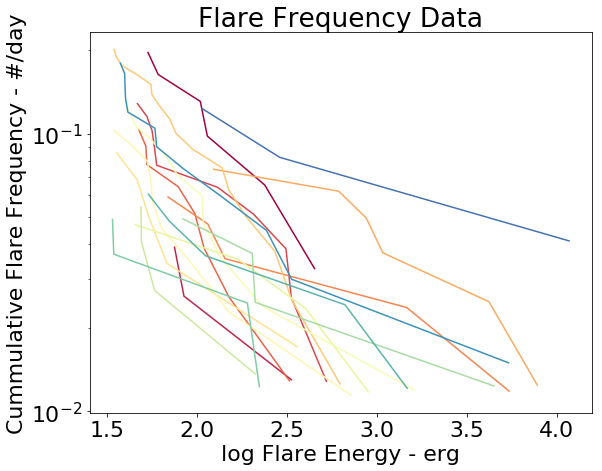

In [15]:
#plotting only the significant data
dir = '004349043' #StarID/directory
files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
EPOINT = 0 # need to fix this
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


plt.figure(figsize=(9,7))
plt.yscale('log')
plt.xlabel("log Flare Energy - erg")
plt.ylabel("Cummulative Flare Frequency - #/day")
plt.title("Flare Frequency Data")
cmap = plt.cm.Spectral # color scheme -- earliest = red, oldest = yellow
np.seterr(invalid='ignore')#ignore the Nans


for x in range(len(files)):
    
    toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                            delim_whitespace=True, usecols=(7,)
                           ).iloc[0].values[0] #getting the total duration of each file
    
    df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
    energy = df['Equiv_Dur'] # This is the energy column of the flare data
    sort = np.argsort(energy) #get indices that would sort the energy array

    ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
    ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day
    ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk
    
    plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files))))#  c = autumn color scheme -- earliest = red, oldest = yellow


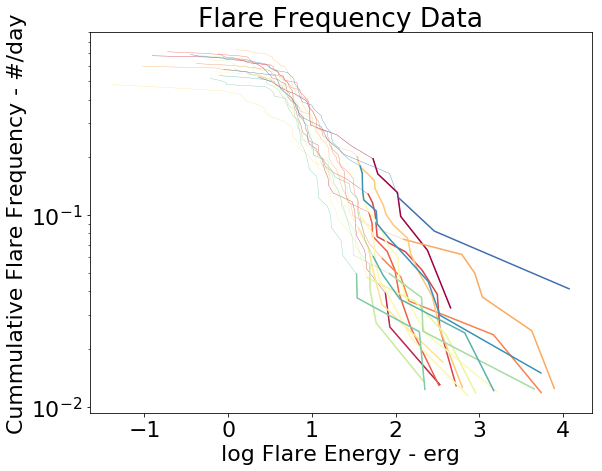

In [16]:
#plotting all of the data, with data below the ED68i cutoff in 'winter' color scheme
dir = '004349043' #StarID/directory
files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
EPOINT = 0 #should fix this
names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
       "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
       "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


plt.figure(figsize=(9,7))
plt.yscale('log')
plt.xlabel("log Flare Energy - erg")
plt.ylabel("Cummulative Flare Frequency - #/day")
plt.title("Flare Frequency Data")
cmap = plt.cm.Spectral # color scheme for significant data - earliest = red, oldest = yellow
#cmap2 = plt.cm.winter # color scheme for insignificant data - earliest = blue, oldest = turqoise
plt.rcParams.update({'font.size': 22})
np.seterr(invalid='ignore')#ignore the Nans


for x in range(len(files)):
    
    toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                            delim_whitespace=True, usecols=(7,)
                           ).iloc[0].values[0]  #getting the total duration of each file
        
    df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
    energy = df['Equiv_Dur'] #This is the energy column of the flare data
    sort = np.argsort(energy) #get indices that would sort the energy array

    ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
    ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day
    ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

    plt.plot(ffd_xEnergy, ffd_yFrequency, lw = .35, c = cmap(x/float(len(files)))) #all data
    plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) #significant data only - red to yellow = earliest to oldest


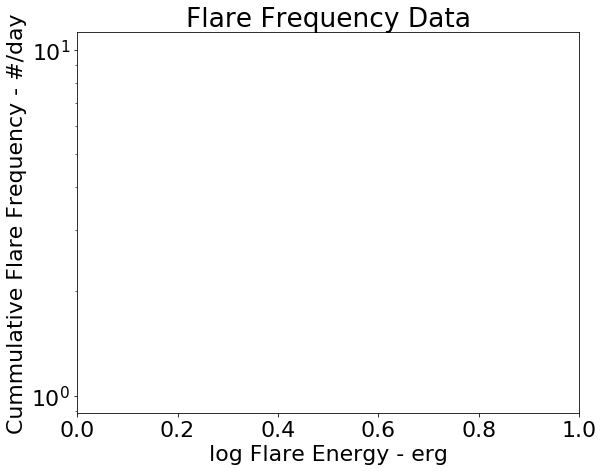

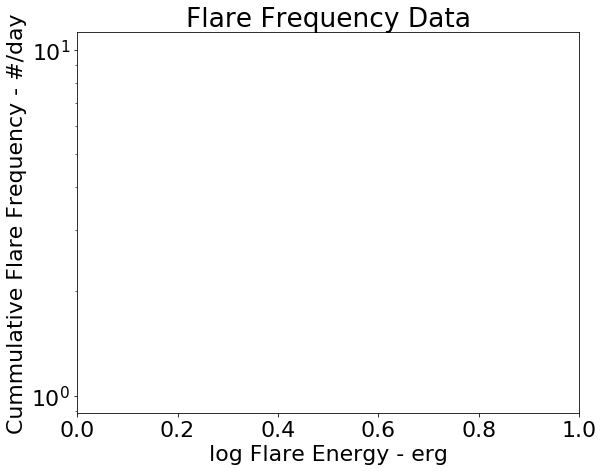

In [10]:
##to be used from terminal w/ command structure ----python flaregraphs.py STARID# STARID# STARID# ----
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

for y in range(len(sys.argv) - 1):

    dir = sys.argv[y+1] #StarID/directory
    files = glob(dir+"/*.flare") #Glob all of the files in the directory - get all flares for a star
    EPOINT = 0 # need to fix this
    names=("t_start", "t_stop", "t_peak", "amplitude", "FWHM", "duration", "t_peak_aflare1", 
           "t_FWHM_aflare1", "amplitude_aflare1", "flare_chisq", "KS_d_model", "KS_p_model", 
           "KS_d_cont", "KS_p_cont", "Equiv_Dur", "ED68i", "ED90i")


    plt.figure(figsize=(9,7))
    plt.yscale('log')
    plt.xlabel("log Flare Energy - erg")
    plt.ylabel("Cummulative Flare Frequency - #/day")
    plt.title("Flare Frequency Data")
    cmap = plt.cm.autumn # color scheme -- earliest = red, oldest = yellow
    np.seterr(invalid='ignore')#ignore the Nans


    for x in range(len(files)):

        toteDur = pd.read_table(files[x], skiprows=5, nrows=1, header=None, 
                                delim_whitespace=True, usecols=(7,)
                               ).iloc[0].values[0] #getting the total duration of each file

        df = pd.read_table(files[x], comment="#", delimiter=",", names=names)
        energy = df['Equiv_Dur'] # This is the energy column of the flare data
        sort = np.argsort(energy) #get indices that would sort the energy array

        ffd_xEnergy = np.log10(energy[sort][::-1]) + EPOINT #log the reverse of sorted energy
        ffd_yFrequency = (np.arange(1, len(ffd_xEnergy)+1, 1))/toteDur #get evenly spaced intervals, divide by totedur to get flares/day
        ok68 = ffd_xEnergy >= np.log10(np.median(df['ED68i'])) + EPOINT #use ED68i to get indices of useful data, ignore the junk

        plt.plot(ffd_xEnergy[ok68], ffd_yFrequency[ok68], c = cmap(x/float(len(files)))) # c = autumn color scheme, earliest = red, oldest = yellow

plt.show()
